In [1]:
%%HTML
<style>
.container { width: 100% }
</style>

# Test DFA-2-RegExp

In [2]:
%run DFA-2-RegExp.ipynb

In [3]:
%run FSM-2-Dot.ipynb

In [4]:
delta = { (0, 'a'): 0,
          (0, 'b'): 1,
          (1, 'a'): 1
        }

In [5]:
A = {0, 1}, {'a', 'b'}, delta, 0, {1}

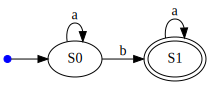

In [6]:
g, _ = dfa2dot(A)
g

In [7]:
r = dfa_2_regexp(A)
r

('+',
 ('+', 'b', ('&', ('&', 'b', ('*', ('+', '', 'a'))), ('+', '', 'a'))),
 ('&',
  ('&',
   ('+', ('+', '', 'a'), ('&', ('&', 'b', ('*', ('+', '', 'a'))), 0)),
   ('*', ('+', ('+', '', 'a'), ('&', ('&', 'b', ('*', ('+', '', 'a'))), 0)))),
  ('+', 'b', ('&', ('&', 'b', ('*', ('+', '', 'a'))), ('+', '', 'a')))))

In [8]:
%run Rewrite.ipynb

In [9]:
s = simplify(r, Rules)
s

('&', ('&', ('*', 'a'), 'b'), ('*', 'a'))

In [10]:
def regexp_2_string(r):
    if r == 0: 
        return "0"
    if r == '': 
        return '""'
    if isinstance(r, str):
        return r
    if r[0] == '&':
        r1, r2 = r[1:]
        return regexp_2_string(r1) + regexp_2_string(r2)        
    if r[0] == '+':
        r1, r2 = r[1:]
        return '(' + regexp_2_string(r1) + '+' + regexp_2_string(r2) + ')'
    if r[0] == '*': 
        r1 = r[1]
        if isinstance(r1, str):
            return regexp_2_string(r1) +'*'
        else:
            return '(' + regexp_2_string(r1) + ')*'
    raise Exception(f'{r} is not a suitable regular expression')

In [11]:
print(regexp_2_string(s))

a*ba*
